In [ ]:
import numpy as np
import nltk
import scipy.stats as ss
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [ ]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [ ]:
def remove_symbols(line):
    return re.sub('[^A-Za-z0-9\s]+', '', line).lower()

In [ ]:
from nltk.corpus import gutenberg
gutenberg.fileids()
['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', ...]
emma = gutenberg.words('austen-emma.txt')
# https://www.nltk.org/howto/corpus.html <= more details and options
# https://www.nltk.org/book/ch02.html
emma

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [ ]:
all_words = list(map(str.lower, emma)) # lowering words
words = set(all_words) # listing unique words
counts = [(w, all_words.count(w)) for w in words] # jusr a tuple of words and its counts

In [ ]:
counts[:10]

[('sup', 1),
 ('polish', 1),
 ('prodigies', 1),
 ('worth', 30),
 ('officious', 1),
 ('rival', 1),
 ('woodhouses', 4),
 ('adoration', 2),
 ('ardent', 2),
 ('civil', 13)]

In [ ]:
# managing frequency dictionary too for wordcloud
freq_dict = {}
for w, c in counts:
  freq_dict[w] = c
# freq_dict

In [ ]:
"""
rank can also be evaluated by sorting above list as well and using indexes,
however that will be totally linear and will have unique rank for each(even if same counts)
"""
count_rank = ss.rankdata([c for (w, c) in counts]) 
counts_ranked = [(c[0], c[1], w) for c, w in zip(counts, count_rank)] # merging in all 3 lists
print(counts_ranked[0:10])
counts_sorted = sorted(counts_ranked, key=lambda _: _[2]) # sorting by rank
"""
Once you sort the rank you can actually see that most used words are mostly words like her, it, of, the etc.
It's good to know that we can not now say that the word is very important if it is used very frequently.
"""
counts_sorted[-10:]

[(',', 11454, 7344.0), ('stranger', 5, 5111.5), ('bursts', 1, 1444.0), ('plot', 1, 1444.0), ('shocking', 6, 5368.5), ('passionately', 2, 3419.0), ('symptoms', 7, 5551.0), ('sung', 2, 3419.0), ('counter', 2, 3419.0), ('conundrum', 3, 4238.5)]


[('her', 2469, 7335.0),
 ('it', 2528, 7336.0),
 ('a', 3129, 7337.0),
 ('i', 3178, 7338.0),
 ('of', 4291, 7339.0),
 ('and', 4896, 7340.0),
 ('the', 5201, 7341.0),
 ('to', 5239, 7342.0),
 ('.', 6928, 7343.0),
 (',', 11454, 7344.0)]

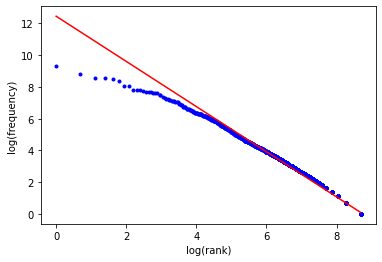

Text(0, 0.5, 'frequency')

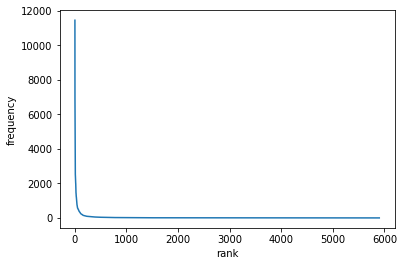

In [ ]:
L = len(counts_sorted)
X = np.array([np.log(L-r+1) for (w, c, r) in counts_sorted])
Y = np.array([np.log(c) for (w, c, r) in counts_sorted])
plt.plot(X, Y, 'b.')
A = np.vstack([X, np.ones(L)]).T
m, c = np.linalg.lstsq(A, Y, rcond=None)[0]
plt.plot(X, m*X + c, 'r')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.show()
plt.plot([L-r+1 for (_, __, r) in counts_sorted], [c for (_, c, __) in counts_sorted])
plt.xlabel('rank')
plt.ylabel('frequency')

# freq = c.r^-alpha
# log freq = log c -alpha log(r)
# y = c + mx

[(0, ('bursts', 1)),
 (1, ('plot', 1)),
 (2, ('_answer_', 1)),
 (3, ('specious', 1)),
 (4, ('library', 1)),
 (5, ('gross', 1)),
 (6, ('oppressive', 1)),
 (7, ('prophetically', 1)),
 (8, ('equals', 1)),
 (9, ('cellery', 1))]

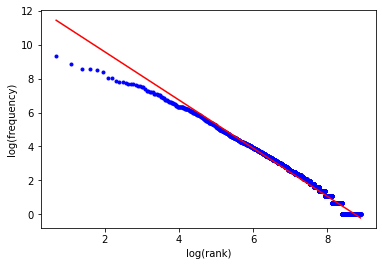

In [ ]:
counts_sorted_ = sorted(counts, key=lambda _:_[1])
counts_with_rank = list(enumerate(counts_sorted_))
# plt.plot()
# print(counts_with_rank[:10])
L_ = len(counts_sorted_)
X_ = np.array([np.log(L-r+1) for (r, (w, c)) in counts_with_rank])
Y_ = np.array([np.log(c) for (r, (w, c)) in counts_with_rank])
plt.plot(X_, Y_, 'b.')
A_ = np.vstack([X_, np.ones(L_)]).T
m_, c_ = np.linalg.lstsq(A_, Y_, rcond=None)[0]
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.plot(X_, m_*X_ + c_, 'r')
# np.shape(A_), np.shape(Y_)
counts_with_rank[:10]

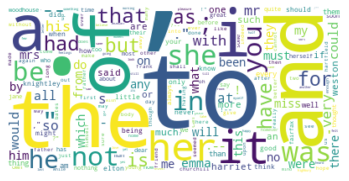

In [ ]:
wc = WordCloud(background_color="white", max_words=1000)
# generate word cloud
wc.generate_from_frequencies(freq_dict)
# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
# hence we're basically printing stopwords

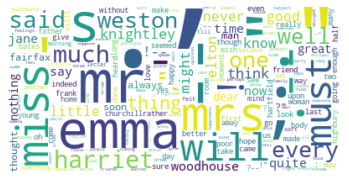

In [ ]:
stopwords = set(STOPWORDS)
freq_dict_ = {}
for w, c in counts:
  if w not in stopwords:
    freq_dict_[w] = c

wc = WordCloud(background_color="white")
# generate word cloud
wc.generate_from_frequencies(freq_dict_)
# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

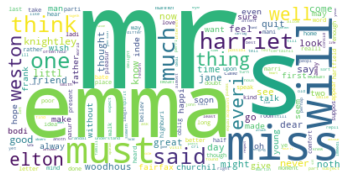

In [ ]:
stopwords = set(STOPWORDS)
freq_dict_ = {}
for w, c in counts:
  if w not in stopwords:
    w = remove_symbols(w)
    if w:
      # print(w, porter.stem(w))
      w = porter.stem(w)
      freq_dict_[w] = freq_dict_.get(w, 0) + c

wc = WordCloud(background_color="white")
# generate word cloud
wc.generate_from_frequencies(freq_dict_)
# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# happy happi
# sacrifice sacrific
# ingenuousness ingenu
# prompt prompt
# large larg


In [ ]:
a = ['happy', 'happiness', 'happiest', 'happier']
# [print(porter.stem(i)) ]
for i in a:
  w = porter.stem(i)
  print(w)

happi
happi
happiest
happier
